# Lab 14: Simplified cost function for logistical regression

In [14]:
import numpy as np
# %matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  plot_data, sigmoid, dlc
plt.style.use('./deeplearning.mplstyle')

## Load sample data

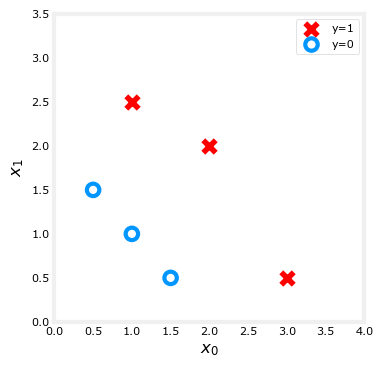

In [16]:
# load classification data
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

# plot classification data
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

# set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Code an appropriate cost function

In [18]:
# The cost function takes the average of all the diffs.
# Instead of calculating the diff (aka loss) one way if the outcome is 1 and another way if the outcome is 0,
# ...we combine those functions in a mathematical way that allows us to use one expression that covers both cases.

def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    total_cost = 0.0
    for i in range(m):
        # We apply the generic sigmoid model. This is the function that we will use to fit the data.
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)

        # This is the difference between the calculated, predicted value and the actual, real value.
        # We are using the simplified version of the loss function for logistical regression.
        total_cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    # Take the average by dividing the total cost by the number of examples
    cost = total_cost / m
    
    return cost

## Choose two arbitrary boundary lines

In [36]:
# Use arbitrary values for w and b to test the above function
w_tmp = np.array([1,1])

# We expect this to print something close to 0.366866
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

# We expect this to print something close to 0.5036
b_tmp = -4
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745
0.5036808636748461


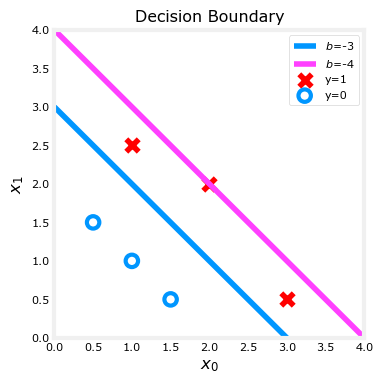

In [38]:
# The below code simply creates a visualization of the two arbitrary boundary lines plotted against the data

# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()